• PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model

1.Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

import pickle 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

In [2]:
def null(df_null):
    df_null= df_null.replace(r'^\s*$', np.NaN, regex=True)
    df_null.isnull().sum()
    return(df_null)

In [3]:
#Impute missing/unexpected values in the DataFrame.
def impute(df_impute):
    df_impute=df_impute.replace(to_replace=' ', value=0, inplace=False)
    df_impute=df_impute.replace(to_replace=np.NaN, value=0, inplace=False)
    return(df_impute)


In [4]:
#Make sure all the variables with continuous values are of ‘Float’ type.

def tofloat_type(df_tofloat,fldName):
    df_tofloat[fldName] = df_tofloat[fldName].astype(float, errors = 'raise')
    print("All the variables with continuous values are of ‘Float’ type" ,df_tofloat.info())
    return(df_tofloat)

In [5]:
def filter_num(df_filter):
    df_filter=df_filter.filter(['MonthlyCharges','TotalCharges'], axis = 1)
    return(df_filter)

In [6]:
## Convert all the categorical variables into dummy variables
def tocat_type(df_cat):
    df_cat[df_cat.select_dtypes(['object']).columns] = df_cat.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    print("The categorical variables are converted into dummy variables",df_cat.head(3))
    return (df_cat)


In [7]:
#Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. 
#Clearly show percentage distribution in the pie-chart.
import matplotlib.pyplot as plt 
def piegenerator(df_cat,colName):
    plt.pie(df_cat[colName].value_counts(), autopct = '%.1f%%',labels=list(df_cat[colName].value_counts().index));
    plt.suptitle(colName)
    plt.show()
    

In [8]:
def pie_cat(df_piecat):
   
    for cl in df_piecat.columns:
        if df_piecat[cl].dtype != float and df_piecat[cl].dtype != int and df_piecat[cl].dtype != np.float64 and df_piecat[cl].dtype != np.int64 and len(df_piecat[cl]) != len(set(df_piecat[cl])):
            piegenerator(df_piecat,cl)

In [9]:
def encode(df_encoded):
    df_encoded=pd.get_dummies(data=df_encoded,drop_first=True)
    return(df_encoded)

In [10]:
#Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split
def split(df_split):
 
    y = df_split['Churn_Yes'].values
    X = df_split.drop(columns = ['Churn_Yes'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, X_test, y_train, y_test,X)


In [11]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
def normalize(X):
    
    X=X.drop(['customerID','gender'],axis =1,inplace =False,errors ='ignore')
    features = X.columns.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X))
    X.columns = features
    return(X)

In [25]:
# create a function ‘preprocessing_’ and call all the preprocessing related functions within that function.
def  preprocessing(df_pre):
        #df_pre=null(df_pre)
        df_pre=impute(df_pre)
        df_pre=tofloat_type(df_pre,'TotalCharges')
        df_pre = tocat_type(df_pre)
       
        return (df_pre)

In [50]:
from sklearn.linear_model import LogisticRegression
#Various base models should be trained to select the best performing model.
def model_logreg(X_train,y_train,X_test,y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    Train_Accuracy1=model.score(X_train,y_train)
    return (metrics.accuracy_score(y_test, prediction_test),model,prediction_test,Train_Accuracy1)

In [55]:
def model_xgb(X_train,y_train,X_test,y_test):
    model = XGBClassifier(colsample_bytree= 0.6, gamma= 1, learning_rate=0.1, max_depth=2, n_estimators= 140)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy_1= accuracy_score(y_test, predictions)
    Train_Accuracy2=model.score(X_train,y_train)
    return (accuracy_1 ,model,predictions,Train_Accuracy2)

In [56]:
def model_rfc(X_train,y_train,X_test,y_test):
    model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
    model_rf.fit(X_train, y_train)
    prediction_test = model_rf.predict(X_test)
    Train_Accuracy3=model_rf.score(X_train,y_train)
    return (metrics.accuracy_score(y_test, prediction_test),model_rf,prediction_test,Train_Accuracy3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


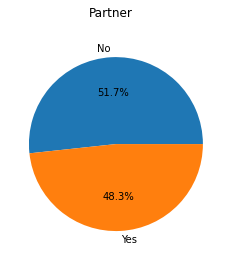

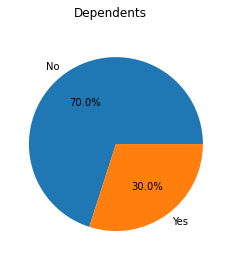

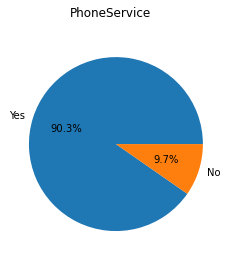

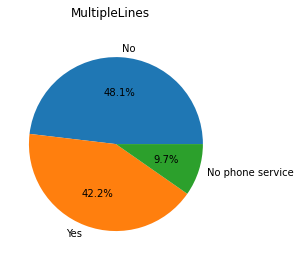

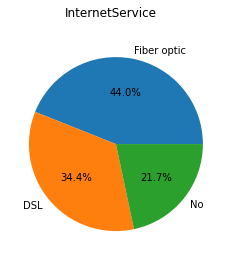

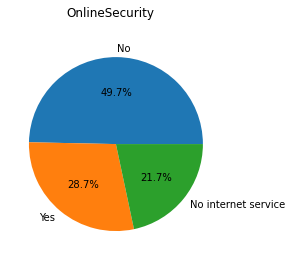

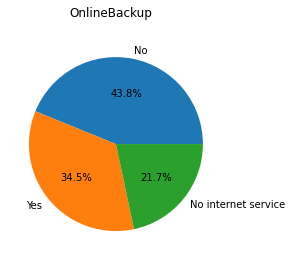

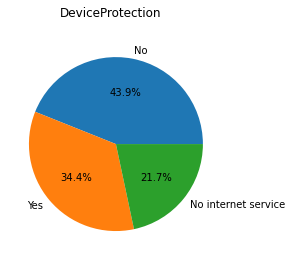

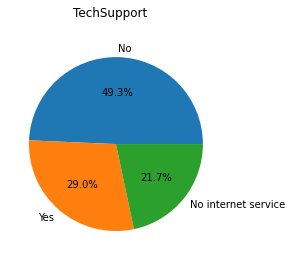

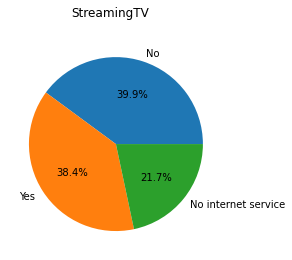

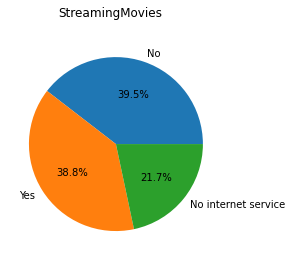

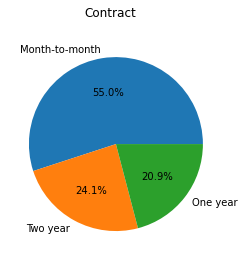

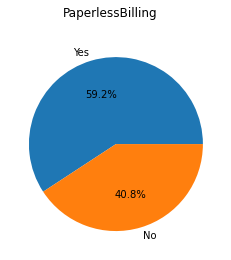

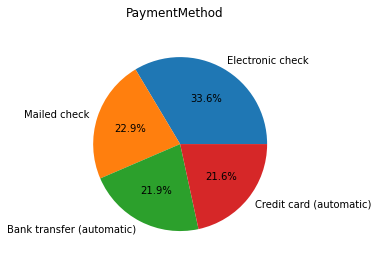

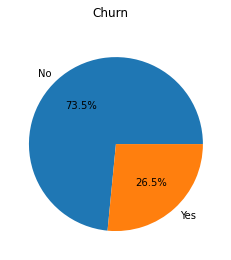

    Model  Test Accuracy  Train Accuracy
0  logreg       0.817601        0.800319
1     xgb       0.816891        0.811324
2     rfc       0.801278        0.811324

Accuracy using Logistic Regression classifier pickled model :  0.8176011355571328


In [57]:
#main code
df = pd.read_csv('Telco-Customer-Churn.csv')
df=df.drop(['customerID','gender'],axis=1)
#df.head()
df_processed=  preprocessing(df)

#df_processed.head()
pie_cat(df_processed)
df_processed=encode(df_processed)
len(df_processed.columns)
X_train, X_test, y_train, y_test,X=split(df_processed)
normalize(X)

accuracy_log,model_log,prediction_log,Train_Accuracy1=model_logreg(X_train,y_train,X_test,y_test)
accuracy_xgb,model_xgb,prediction_xgb,Train_Accuracy2=model_xgb(X_train,y_train,X_test,y_test)
accuracy_rfc,model_rfc,prediction_rfc,Train_Accuracy3=model_rfc(X_train,y_train,X_test,y_test)

models = [('logreg',accuracy_log,Train_Accuracy1 ),
          ('xgb', accuracy_xgb,Train_Accuracy2),
          ('rfc', accuracy_rfc,Train_Accuracy3)
                   ]
predict = pd.DataFrame(data = models, columns=['Model',  'Test Accuracy' , 'Train Accuracy'])
print(predict)

#Pickle the file
import pickle
Pickled = pickle.dumps(model_log) 
    
Pickled_Load = pickle.loads(Pickled)

y_pred_1 = Pickled_Load.predict(X_test)
Accuracy_Pickled = accuracy_score(y_true=y_test, y_pred=prediction_log)
print("\nAccuracy using Logistic Regression classifier pickled model : ", Accuracy_Pickled)

Logarithmic Regression Classifier model performs better in this case and is pickled. We have compared the accuracies of XgB and random forest classifier along with log reg but comparatively better accuracies are given by log reg model, with xgb following it immediately.Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. 